In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.8 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.2732 - val_loss: 0.0266
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0357 - val_loss: 0.0260
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0209 - val_loss: 0.0315
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095 - val_loss: 0.0150
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - val_loss: 0.0060
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.3536e-04 - val_loss: 8.9348e-04
Epoch 68/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.7042e-04 - val_loss: 0.0010
Epoch 69/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1909e-04 - val_loss: 0.0011
Epoch 70/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6450e-04 - val_loss: 9.7043e-04
Epoch 71/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.5484e-04 - val_loss: 0.0011
Epoch 72/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7050e-04 - val_loss: 8.2433e-04
Epoch 73/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.9520e-04 - val_loss: 7.9120e-04
Epoch 74/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.2848e-04 - val_loss: 7.9259e-04
Epoch 75/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6875e-04 - val_loss: 7.7523e-04
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2361e-04 - val_loss: 9.4642e-04
Epoch 77/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7905e-04 - v

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1828.8871514594734
MAPE: 1.8330794821163787 %
MSLE: 0.0006049901509951754


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.57260172 0.5912654  0.56513624 0.55953714 0.54647256 0.54833893
 0.53900709 0.53900709 0.52967525 0.53154162 0.53714072 0.53527436
 0.53527436 0.54087346 0.51287794 0.50912654 0.50541247 0.50727884
 0.53900709 0.52780888 0.52780888 0.59873087 0.63979097 0.62486002
 0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.945

7 day output [[0.91243804]]
8 day input [0.52967525 0.53154162 0.53714072 0.53527436 0.53527436 0.54087346
 0.51287794 0.50912654 0.50541247 0.50727884 0.53900709 0.52780888
 0.52780888 0.59873087 0.63979097 0.62486002 0.62112729 0.6379246
 0.64912281 0.65098918 0.64725644 0.65285554 0.66592012 0.70324748
 0.70324748 0.68085106 0.71071295 0.69764838 0.71257932 0.70511385
 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588
 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126 0.731243
 0.73684211 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295
 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.

15 day output [[0.8693247]]
16 day input [0.50541247 0.50727884 0.53900709 0.52780888 0.52780888 0.59873087
 0.63979097 0.62486002 0.62112729 0.6379246  0.64912281 0.65098918
 0.64725644 0.65285554 0.66592012 0.70324748 0.70324748 0.68085106
 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116 0.71817842
 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404 0.78723404
 0.79656588 0.80776409 0.76297126 0.731243   0.73684211 0.72004479
 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479
 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852
 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95929193 0.95881772

23 day output [[0.8460162]]
24 day input [0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.95929193 0.95881772
 0.9426704  0.93936884 0.92873871 0.9214834  0.91594017 0.91243804
 0.90439397 0.9012987

32 day output [[0.8241481]]
33 day input [0.68085106 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116
 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404
 0.78723404 0.79656588 0.80776409 0.76297126 0.731243   0.73684211
 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385
 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         0.98320269 0.98320269 0.98880179 0.97760358
 0.98320269 0.95929193 0.95881772 0.9426704  0.93936884 0.92873871
 0.9214834  0.91594017 0.91243804 0.90439397 0.9012987  0.89247358
 0.88842052 0.88151062 0.87850285 0.87301564 0.86932468 0.86542219
 0.8635124  0.8602411

40 day output [[0.8093346]]
41 day input [0.73870847 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588
 0.80776409 0.76297126 0.731243   0.73684211 0.72004479 0.71631206
 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479
 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852
 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947
 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614
 0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.95929193
 0.95881772 0.9426704  0.93936884 0.92873871 0.9214834  0.91594017
 0.91243804 0.90439397 0.9012987  0.89247358 0.88842052 0.88151062
 0.87850285 0.87301564 0.86932468 0.86542219 0.8635124  0.86024117
 0.85776502 0.85366166 0.85099947 0.84803879 0.84601623 0.84349251
 0.8412317  0.83830649 0.83608

48 day output [[0.79696745]]
49 day input [0.731243   0.73684211 0.72004479 0.71631206 0.71257932 0.71257932
 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748
 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131
 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668
 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215
 0.85255692 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901
 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.95929193 0.95881772 0.9426704
 0.93936884 0.92873871 0.9214834  0.91594017 0.91243804 0.90439397
 0.9012987  0.89247358 0.88842052 0.88151062 0.87850285 0.87301564
 0.86932468 0.86542219 0.8635124  0.86024117 0.85776502 0.85366166
 0.85099947 0.84803879 0.84601623 0.84349251 0.8412317  0.83830649
 0.83608639 0.83345324 0.83106107 0.82852876 0.82628042 0.82414812
 0.82240885 0.82050091

56 day output [[0.786432]]
57 day input [0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         0.98320269 0.98320269 0.98880179 0.97760358
 0.98320269 0.95929193 0.95881772 0.9426704  0.93936884 0.92873871
 0.9214834  0.91594017 0.91243804 0.90439397 0.9012987  0.89247358
 0.88842052 0.88151062 0.87850285 0.87301564 0.86932468 0.86542219
 0.8635124  0.86024117 0.85776502 0.85366166 0.85099947 0.84803879
 0.84601623 0.84349251 0.8412317  0.83830649 0.83608639 0.83345324
 0.83106107 0.82852876 0.82628042 0.82414812 0.82240885 0.82050091
 0.81875372 0.81682462 0.81504154 0.81310064 0.81124753 0.80933458
 0.8075307  0.80587351

64 day output [[0.7775706]]
65 day input [0.76857036 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947
 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614
 0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.95929193
 0.95881772 0.9426704  0.93936884 0.92873871 0.9214834  0.91594017
 0.91243804 0.90439397 0.9012987  0.89247358 0.88842052 0.88151062
 0.87850285 0.87301564 0.86932468 0.86542219 0.8635124  0.86024117
 0.85776502 0.85366166 0.85099947 0.84803879 0.84601623 0.84349251
 0.8412317  0.83830649 0.83608639 0.83345324 0.83106107 0.82852876
 0.82628042 0.82414812 0.82240885 0.82050091 0.81875372 0.81682462
 0.81504154 0.81310064 0.81124753 0.80933458 0.8075307  0.80587351
 0.80427146 0.80282289 0.80123895 0.79989588 0.79832745 0.79696745
 0.79545397 0.7940886  0.79270

72 day output [[0.76981765]]
73 day input [0.74244121 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215
 0.85255692 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901
 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.95929193 0.95881772 0.9426704
 0.93936884 0.92873871 0.9214834  0.91594017 0.91243804 0.90439397
 0.9012987  0.89247358 0.88842052 0.88151062 0.87850285 0.87301564
 0.86932468 0.86542219 0.8635124  0.86024117 0.85776502 0.85366166
 0.85099947 0.84803879 0.84601623 0.84349251 0.8412317  0.83830649
 0.83608639 0.83345324 0.83106107 0.82852876 0.82628042 0.82414812
 0.82240885 0.82050091 0.81875372 0.81682462 0.81504154 0.81310064
 0.81124753 0.80933458 0.8075307  0.80587351 0.80427146 0.80282289
 0.80123895 0.79989588 0.79832745 0.79696745 0.79545397 0.7940886
 0.79270321 0.79142922 0.79011303 0.78889084 0.78758878 0.78643203
 0.78517914 0.78407305 

81 day output [[0.7623918]]
82 day input [0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.95929193 0.95881772 0.9426704  0.93936884 0.92873871 0.9214834
 0.91594017 0.91243804 0.90439397 0.9012987  0.89247358 0.88842052
 0.88151062 0.87850285 0.87301564 0.86932468 0.86542219 0.8635124
 0.86024117 0.85776502 0.85366166 0.85099947 0.84803879 0.84601623
 0.84349251 0.8412317  0.83830649 0.83608639 0.83345324 0.83106107
 0.82852876 0.82628042 0.82414812 0.82240885 0.82050091 0.81875372
 0.81682462 0.81504154 0.81310064 0.81124753 0.80933458 0.8075307
 0.80587351 0.80427146 0.80282289 0.80123895 0.79989588 0.79832745
 0.79696745 0.79545397 0.7940886  0.79270321 0.79142922 0.79011303
 0.78889084 0.78758878 0.78643203 0.78517914 0.78407305 0.78287208
 0.78180796 0.78070074 0.77968264 0.77860212 0.77757061 0.7764864
 0.77547175 0.77443343 0.

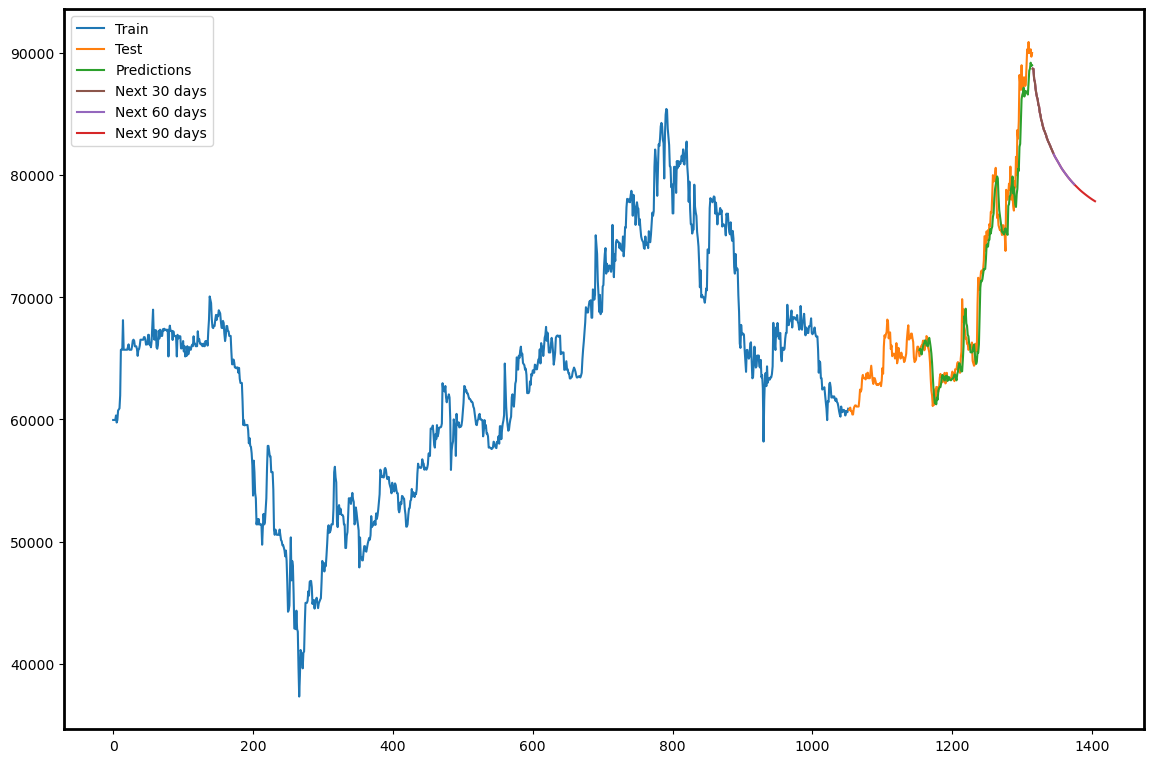

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_SCS_82.png")
plt.show()